<h2>Petfinder.my Data Exploration</h2>

In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Import data

df = pd.read_csv('c://users//nkeen//Documents//Springboard//Capstone2//petfinder-adoption-prediction//train//train.csv')

In [5]:
#check to ensure numbers are stored as integers and not text objects
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [10]:
# Correlate features in the dataset and sort results for correlation to AdoptionSpeed, the label.

#Correlate cats and dogs separately.  Dogs are 1 and Cats are 2.
c = df.groupby(['Type']).corr()
c['AdoptionSpeed'].sort_values().drop_duplicates()


Type               
1     FurLength       -0.105275
2     Sterilized      -0.100239
      FurLength       -0.076639
1     Sterilized      -0.070336
2     Vaccinated      -0.067206
      Breed2          -0.046349
      Color1          -0.043110
      Breed1          -0.040904
1     Vaccinated      -0.038337
2     PhotoAmt        -0.037643
1     Fee             -0.032789
      Color1          -0.027801
2     Dewormed        -0.017553
      Color2          -0.017500
1     Color2          -0.015956
2     VideoAmt        -0.015115
1     Dewormed        -0.005764
      Breed2          -0.003321
      Color3          -0.002475
      PhotoAmt        -0.002064
      VideoAmt         0.009914
      State            0.013673
2     Color3           0.024713
1     MaturitySize     0.024993
      Health           0.027692
2     Health           0.030358
      Fee              0.032595
      State            0.035757
      MaturitySize     0.036030
      Gender           0.043446
1     Age           

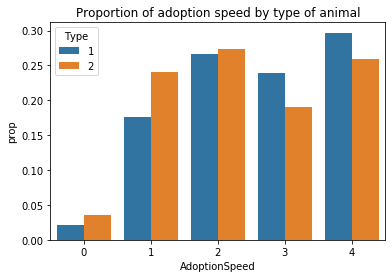

In [19]:
#Visualize the proportion of cats and dogs that are adopted at each AdoptionSpeed category.
#The lower the AdoptionSpeed the quicker the animal was adopted.

x, y, hue = "AdoptionSpeed", "prop", "Type"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.title("Proportion of adoption speed by type of animal")
plt.show()

#It appears cats are adopted more quickly than dogs.

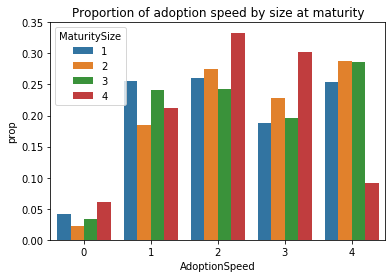

In [15]:
#Visualize the proportion of animals adopted in the differing AdoptionSpeeds by the size of the animal.
#1=small, 2=medium, 3=large, 4=extra large

x, y, hue = "AdoptionSpeed", "prop", "MaturitySize"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.title("Proportion of adoption speed by size at maturity")
plt.show()

#Most extra large animals are adopted before 100 days (AdoptionSpeed = 4)
#Extra large animals were adopted on the first day (AdoptionSpeed = 0) more than other animal sizes.

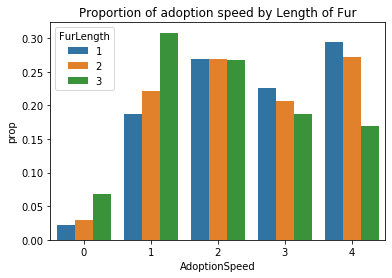

In [21]:
#Visualize speed of adoption by length of animal fur.

x, y, hue = "AdoptionSpeed", "prop", "FurLength"

#1=short, 2=Medium, 3=Long
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.title("Proportion of adoption speed by Length of Fur")
plt.show()

#Animals with long fur appear to be adopted sooner than animals with short fur.

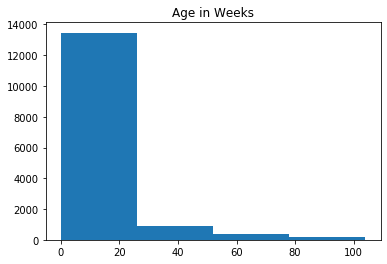

In [22]:
#Visualize age composition of dataset.

x, y, hue = "AdoptionSpeed", "prop", "Quantity"

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

plt.hist(df['Age'], bins=[0,26, 52, 78, 104])
_ = plt.title("Age in Weeks")
plt.show()

#most animals up for adoption are less than six months old (26 weeks)

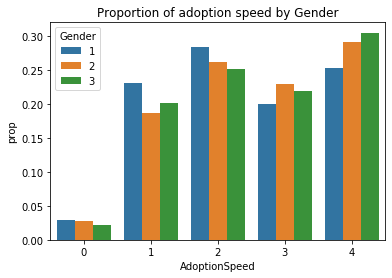

In [16]:
#Visualize adoption speed by gender of animal.

x, y, hue = "AdoptionSpeed", "prop", "Gender"
# 1=Male, 2=Female, 3=Mixed or Gender unknown
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)
_ = plt.legend 
_ = plt.title("Proportion of adoption speed by Gender")
plt.show()

#Males are adopted sooner than females

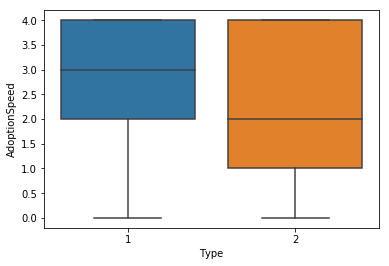

In [27]:
#Visualize variance in adoption speed between dogs(1) and cats(2)
sns.boxplot(df['Type'], df['AdoptionSpeed'])

In [16]:
#Average adoption speed by type
df.groupby(df['Type'])['AdoptionSpeed'].mean()

Type
1    2.615101
2    2.399504
Name: AdoptionSpeed, dtype: float64

In [6]:
#median sdoption speed by type
df.groupby(df['Type']).AdoptionSpeed.median()

Type
1    3
2    2
Name: AdoptionSpeed, dtype: int64

In [38]:
#Mode of adoption speed by type
df.groupby(df['Type']).AdoptionSpeed.apply(lambda x: x.mode())


Type   
1     0    4
2     0    2
Name: AdoptionSpeed, dtype: int64